# Logistic Regression

Some regression algorithms can be used for classification (and vice versa). Logistic regression (also called logit regression) is commonly used to estimate the probability that an instance belongs to a particular class (e.g., what is the probability that this email is spam?). If the estimated probability is greater than a given threshold (typically 50%), then the model predicts that the instance belongs to that class (called the positive class, labeled “1”), and otherwise it predicts that it does not (i.e., it belongs to the negative class, labeled “0”). This makes it a binary classifier.

So how does logistic regression work? Just like a linear regression model, a logistic regression model computes a weighted sum of the input features (plus a bias term), but instead of outputting the result directly like the linear regression model does, it outputs the logistic of this result.

$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b ) \tag{1} $$ 

where
$$g(z) = \frac{1}{1+e^{-z}}\tag{2}$$

![image.png](lr_images/sigmoid.PNG)

Logistic function

## Training and Cost Function
Now you know how a logistic regression model estimates probabilities and makes predictions. But how is it trained? The objective of training is to set the parameter vector θ so that the model estimates high probabilities for positive instances (y = 1) and low probabilities for negative instances (y = 0).This idea is captured by the cost function shown in below equation for a single training instance:



\begin{equation}
  loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = \begin{cases}
    - \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=1$}\\
    - \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=0$}
  \end{cases}
\end{equation}

*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value.
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot\mathbf{x}^{(i)}+b)$ where function $g$ is the sigmoid function.


This cost function makes sense because –log(t) grows very large when t approaches 0, so the cost will be large if the model estimates a probability close to 0 for a positive instance, and it will also be large if the model estimates a probability close to 1 for a negative instance. On the other hand, –log(t) is close to 0 when t is close to 1, so the cost will be close to 0 if the estimated probability is close to 0 for a negative instance or close to 1 for a positive instance, which is precisely what we want.

The cost function over the whole training set is the average cost over all training instances. It can be written in a single expression called the log loss:

$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{4}$$

where 

$$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{5}$$

## Logistic Regression using Scikit-Learn

We will use penguins dataset. We will try to predict the penguin species using the culmen information. This dataset contains three types of **Adelie**, **Gentoo** and **Chinstrap** penguins.

In [37]:
import pandas as pd

penguins = pd.read_csv("penguins.csv")
penguins = penguins.dropna(axis=0)

bill_columns = ["bill_length_mm", "bill_depth_mm"]
penguins.species.unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

For model fitting, we will separate the target from the data and we will create a training and a testing set.

In [42]:
from sklearn.model_selection import train_test_split

x = penguins[bill_columns]
y = penguins.species

x_train,x_test,y_train , y_test = train_test_split(x,y,test_size=.80 ,random_state=42)


Scikit-learn provides the class ``LogisticRegression`` which implements this algorithm.

In [41]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

logistic_regression = make_pipeline(
    StandardScaler(), LogisticRegression(penalty="none")
)
logistic_regression.fit(x_train, y_train)
accuracy = logistic_regression.score(x_test, y_test)
print(f"Accuracy on test set: {accuracy:.3f}")

Accuracy on test set: 0.966


Since we are dealing with a classification problem containing only 2 features, it is then possible to observe the decision function boundary. The boundary is the rule used by our predictive model to affect a class label given the feature values of the sample.

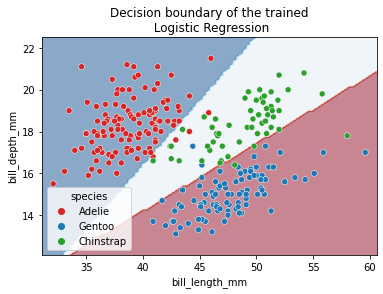

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay


DecisionBoundaryDisplay.from_estimator(
    logistic_regression, x_test, response_method="predict", cmap="RdBu_r", alpha=0.5
)
sns.scatterplot(
    data=x_test, x=bill_columns[0], y=bill_columns[1],
    hue=y, palette=["tab:red", "tab:blue","tab:green"])
_ = plt.title("Decision boundary of the trained\n Logistic Regression")


## References
- Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 3rd Edition
- Machine learning in Python with scikit-learn
- Machine Learning Specialization, Coursera